<a href="https://colab.research.google.com/github/robo7179/summer-of-code-2023/blob/main/HOUSE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House price prediction model



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv("/content/sample_data/california_housing_train.csv")
#contents of data
df.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
df.describe()
#mean,median,max,min

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


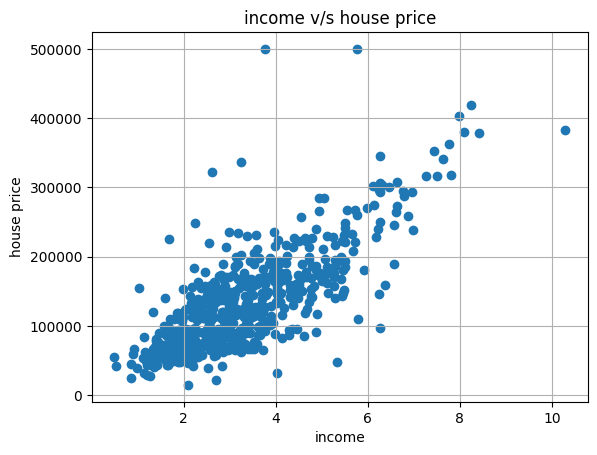

In [4]:
x=df["median_income"].tolist()
y=df["median_house_value"].tolist()
x1=df["median_income"][:600].tolist()
y1=df["median_house_value"][:600].tolist()
plt.scatter(x1,y1)
plt.grid(True)
plt.xlabel("income")
plt.ylabel("house price")
plt.title("income v/s house price")
plt.show()

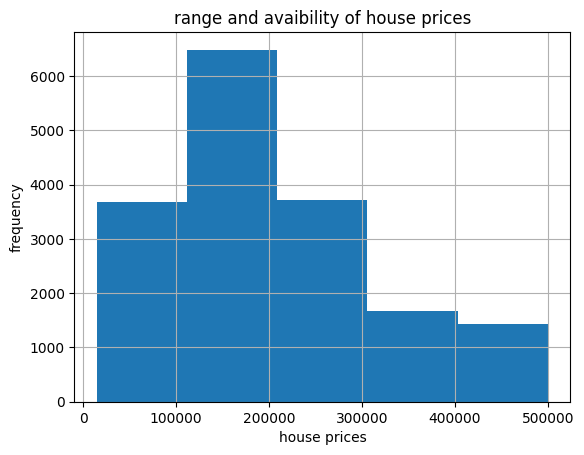

In [5]:
plt.hist(y,bins=5)
plt.xlabel("house prices")
plt.ylabel("frequency")
plt.title("range and avaibility of house prices")
plt.grid(True)
plt.show()

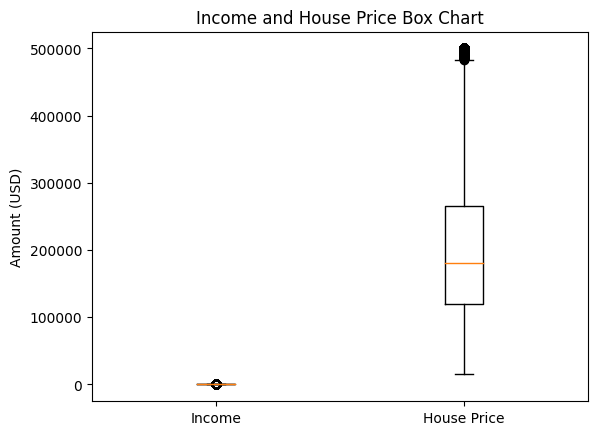

In [6]:
fig, ax = plt.subplots()
ax.boxplot([x, y])
ax.set_xticklabels(['Income', 'House Price'])  # Set x-axis tick labels
ax.set_ylabel('Amount (USD)')  # Set y-axis label
ax.set_title('Income and House Price Box Chart')  # Set title
plt.show()


In [17]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
#prepare data
x_train1=np.array(x)
x_train=x_train1.reshape(-1,1)
y_train=np.array(y)
df1=pd.read_csv("/content/sample_data/california_housing_test.csv")
x_test1=df1["median_income"].tolist()
temp=np.array(x_test1)
x_test=temp.reshape(-1,1)
y_test1=df1["median_house_value"].tolist()
y_test=np.array(y_test1)
#model applied
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#Error analysis
actual_values = y_test
predicted_values = y_pred

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)


print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
model.score(x_test,y_test)
#q=np.array([[1.25]])
#model.predict(q)





MSE: 7009935982.6736
MAE: 62266.41153219215
RMSE: 83725.36045114168


0.45199761620033374

In [15]:
#decision trees
from sklearn.tree import DecisionTreeClassifier  # For classification tasks
from sklearn.tree import DecisionTreeRegressor  # For regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # For classification tasks
from sklearn.metrics import mean_squared_error  # For regression tasks
from sklearn.metrics import mean_absolute_error
# Create and train the Decision Tree model
classifier = DecisionTreeClassifier()
regressor = DecisionTreeRegressor()
classifier.fit(x_train, y_train)
regressor.fit(x_train, y_train)

# Make predictions
y_pred_cls = classifier.predict(x_test)  # For classification tasks
y_pred_reg = regressor.predict(x_test)  # For regression tasks

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_cls)  # For classification tasks
# For regression tasks
mse = mean_squared_error(y_test, y_pred_reg)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred_reg)

print("Accuracy:", accuracy)  # For classification tasks
# For regression tasks
print("MSE:", mse)
print("MAE",mae)
print("RMSE",rmse)
model.score(x_test,y_test)


Accuracy: 0.017
MSE: 10898764014.653189
MAE 77185.99714252862
RMSE 104397.14562502745


0.45199761620033374

In [14]:
#randomn forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error



# Create and train the Random Forest model
classifier = RandomForestClassifier(n_estimators=30,max_depth=5)
regressor = RandomForestRegressor(n_estimators=30,max_depth=5)
classifier.fit(x_train, y_train)
regressor.fit(x_train, y_train)

# Make predictions
y_pred_cls1 = classifier.predict(x_test)  # For classification tasks
y_pred_reg1 = regressor.predict(x_test)  # For regression tasks

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_cls1)  # For classification tasks
# For regression tasks
mse = mean_squared_error(y_test, y_pred_reg1)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred_reg1)


print("Accuracy:", accuracy)  # For classification tasks
 # For regression tasks
print("MSE:", mse)
print("MAE",mae)
print("RMSE",rmse)
model.score(x_test,y_test)


Accuracy: 0.043333333333333335
MSE: 6779562930.171166
MAE 61138.840909262595
RMSE 82338.10132721768


0.45199761620033374

In [20]:
#most efficient and accurate is randomn forest
#give number of inputs and then input
n=int(input())
a=[]
for i in range(n):
  a.append(eval(input()))
b=np.array(a)
c=b.reshape(-1,1)
regressor.predict(c)

2
1.36
1.25


array([48300., 64300.])